
# Part I - Prosper Loan Dataset
## by Mark Amir Anwar 

## Introduction

 The **Prosper Loan Dataset** is a financial dataset of **America’s first peer-to-peer lending marketplace** which is **Prosper Marketplace**, which has funded loans above $23 billion. This dataset is quite helpful for  learning more about how people borrow money, what is the loan performance, and what are the borrower’s  characteristics. It has 81 columns of **925 million data piece**. 
 
This dataset provides details such as: **Borrower Employment Status, Loan Closed Date, Loan  status, and Loan Duration.** This dataset is quite effective in examining **loan repayment behavior, risk evaluation and  identifying trends in financial peer-to-peer lending.**   

The time that has been spent on this dataset is  used to **gain understanding of borrower reliability and to find new strategies that can help in avoiding loan failure or loan escape.** All in all, this data set can be used as a real-world financial analysis.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
columns_to_delete = ["ListingKey", "GroupKey", "LoanOriginationDate", "InvestmentFromFriendsAmount", "CreditGrade", "EmploymentStatusDuration", "ClosedDate", "PercentFunded", "ProsperRating (numeric)", "ProsperRating (Alpha)", "ProsperScore", "CreditScoreRangeLower", "CreditScoreRangeUpper", "FirstRecordedCreditLine", "CurrentCreditLines", "OpenCreditLines", "TotalCreditLinespast7years" , "OpenRevolvingAccounts", "OpenRevolvingMonthlyPayment", "InquiriesLast6Months", "TotalInquiries", "RevolvingCreditBalance", "BankcardUtilization", "AvailableBankcardCredit", "TradesNeverDelinquent (percentage)", "LoanFirstDefaultedCycleNumber", "TotalProsperLoans", "TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding", "GroupKey", "ListingCreationDate", "DateCreditPulled"]
df = df.drop(columns = columns_to_delete, axis = 1)
df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ListingCategory (numeric),...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,Recommendations,InvestmentFromFriendsCount,Investors
0,193129,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,0,...,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,0,0,258
1,1209647,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,2,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,1
2,81716,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,0,...,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,0,0,41
3,658116,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,16,...,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,0,0,158
4,909464,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,2,...,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,0,0,20


In [5]:
df.isna().sum()

ListingNumber                          0
Term                                   0
LoanStatus                             0
BorrowerAPR                           25
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield            29084
EstimatedLoss                      29084
EstimatedReturn                    29084
ListingCategory (numeric)              0
BorrowerState                       5515
Occupation                          3588
EmploymentStatus                    2255
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
CurrentDelinquencies                 697
AmountDelinquent                    7622
DelinquenciesLast7Years              990
PublicRecordsLast10Years             697
PublicRecordsLast12Months           7604
TotalTrades                         7544
TradesOpenedLast6Months             7544
DebtToIncomeRatio                   8554
IncomeRange                            0
IncomeVerifiable

In [6]:
df.fillna(0, inplace = True)
df.isna().sum()

ListingNumber                      0
Term                               0
LoanStatus                         0
BorrowerAPR                        0
BorrowerRate                       0
LenderYield                        0
EstimatedEffectiveYield            0
EstimatedLoss                      0
EstimatedReturn                    0
ListingCategory (numeric)          0
BorrowerState                      0
Occupation                         0
EmploymentStatus                   0
IsBorrowerHomeowner                0
CurrentlyInGroup                   0
CurrentDelinquencies               0
AmountDelinquent                   0
DelinquenciesLast7Years            0
PublicRecordsLast10Years           0
PublicRecordsLast12Months          0
TotalTrades                        0
TradesOpenedLast6Months            0
DebtToIncomeRatio                  0
IncomeRange                        0
IncomeVerifiable                   0
StatedMonthlyIncome                0
LoanKey                            0
S

### What is the structure of your dataset?

Our data is **Pandas DataFrame** with **81 columns** and a combination of **numerical and category data** also **Boolean** data in `CurrentlyInGroup` & `IsBorrowerHomeowner` columns and **DateTime** in `ListingCreationDate` column which make up our dataset. In addition, the numerical data is separated into **integer and float** types. The dataset offers comprehensive information about loans, including credit history, interest rates, loan status, and borrower details. We may examine loan patterns and borrower behavior over time with the use of important variables like LoanStatus, BorrowerState, and LoanOriginationQuarter.


### What is/are the main feature(s) of interest in your dataset?

Our analysis's main goal is to comprehend **loan repayment trends and the variables that affect loan defaults**. To find out what loans were entirely repaid, charged off, or are still outstanding, we are specifically interested in looking into LoanStatus. Furthermore, we seek to determine the effects of variables such as BorrowerAPR, DebtToIncomeRatio, and CreditScoreRange on loan repayment performance.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Several important characteristics will offer insightful information when investigating loan repayment patterns: 

>`BorrowerAPR` & `BorrowerRate`: Knowing how interest rates affect loan defaults is possible with 

>`DebtToIncomeRatio`: Assessing the likelihood of default for debtors with high debt-to-income ratios.

>`CreditScoreRangeLower` & `CreditScoreRangeUpper`: Verifying whether debtors with higher credit ratings have better payback rates is done using.

>`Employment Status` and `StatedMonthlyIncome`: Analyzing the connection between loan repayment success, income levels, and employment status.

>`LoanTerm` & `LoanOriginalAmount`: Examining the potential effects of longer loan durations or higher loan amounts on repayment patterns.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000')])

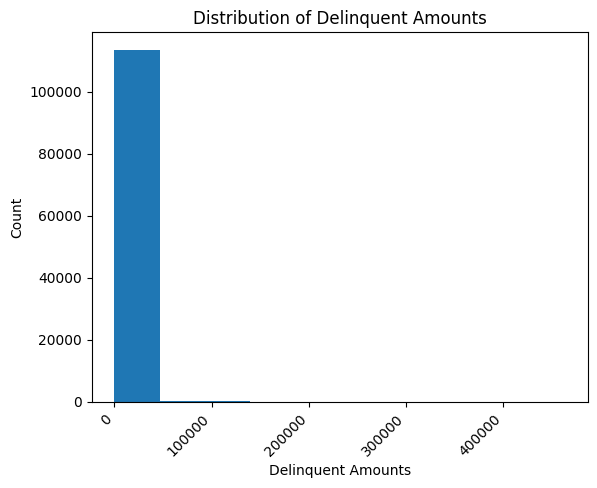

In [7]:
plt.hist(df["AmountDelinquent"])

plt.title("Distribution of Delinquent Amounts")
plt.xlabel("Delinquent Amounts")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the previous histogram of the column `AmountDelinquent` we observed that the histogram is **Left Skewed** so this means that most delinquent amounts are relatively small and do not reach extremely higher values (< 10,0000 dollars) morever, we can observe that the delinquents repeat with high values so this needs higher strict measures to avoid losses, even if they are minor. <br>
Another thing that was noticed is that the percentage of delinquents debts can be predicted because it falls within a specific range, and of course there can be a number of outliers we can't observe. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data of this column had about 7622 missing values but this number is relatively small comapred to the whole values so we used filling the NaNs.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Current'),
  Text(1, 0, 'Completed'),
  Text(2, 0, 'Chargedoff'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Past Due (1-15 days)'),
  Text(5, 0, 'Past Due (31-60 days)'),
  Text(6, 0, 'Past Due (61-90 days)'),
  Text(7, 0, 'Past Due (91-120 days)'),
  Text(8, 0, 'Past Due (16-30 days)'),
  Text(9, 0, 'FinalPaymentInProgress'),
  Text(10, 0, 'Past Due (>120 days)'),
  Text(11, 0, 'Cancelled')])

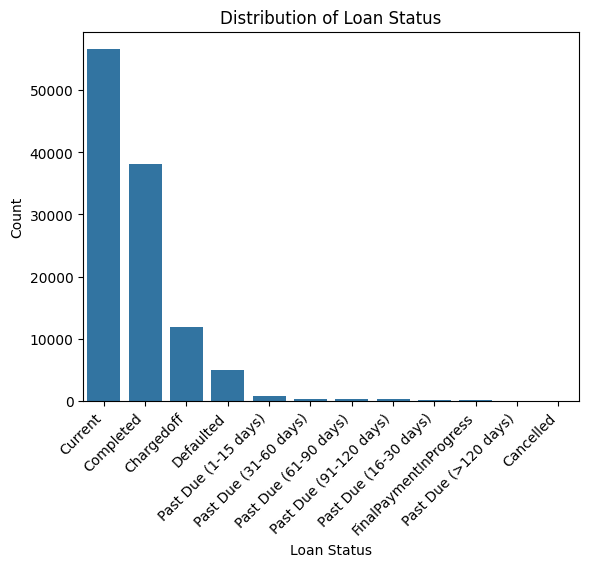

In [8]:
status_counts = df["LoanStatus"].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, color = "#1f77b4")

plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the previous bar chart of the column LoanStatus we observed that: <br>

* The current loans have the highest percentage.

* In the second place, the completed loans show that the bank has strong policies in payments.

* The charged-off & defaulted loans have a noticeable percentage; thus, we need to follow the following guidelines:

1. Implement stricter credit criteria and use AI tools to strengthen risk assessment.

2. Offer flexible repayment plans and financial counseling to at-risk borrowers.

3. Partner with recovery agencies and offer settlement options for defaulted loans.

4. Provide lower rates and cashback rewards for timely repayments.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data of this column was clean & tidy.


## Bivariate Exploration

Text(0, 0.5, 'Estimated Return')

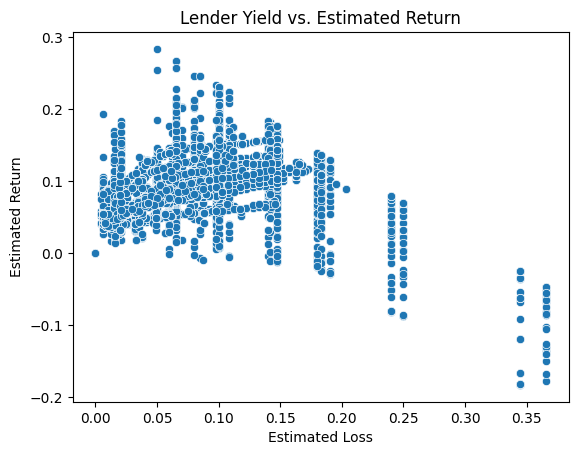

In [9]:
sns.scatterplot(data=df, x="EstimatedLoss", y="EstimatedReturn")

plt.title("Lender Yield vs. Estimated Return")
plt.xlabel("Estimated Loss")
plt.ylabel("Estimated Return")

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The scatter plot illustrates a clear negative trend between Estimated Return and Estimated Loss, indicating that larger losses correspond to lower returns. However, outliers with extreme estimated losses above 0.25 result in negative returns, highlighting high-risk, low-reward scenarios. The clustering of data around specific estimated loss values may indicate predefined risk categories used by the bank.To enhance profitability, the bank should improve its risk evaluation models.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I noticed some interesting correlations between certain features. The scatter plot suggests that as estimated loss increases, estimated return tends to decrease. There is a noticeable cluster of data points where estimated loss is low, with mostly positive returns. However, for higher estimated losses, some returns turn negative, signaling a higher risk. Additionally, certain loss values show clustering, indicating potential patterns in lending behavior. The spread of data points suggests that lenders are willing to take some level of risk but generally avoid excessive risks.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

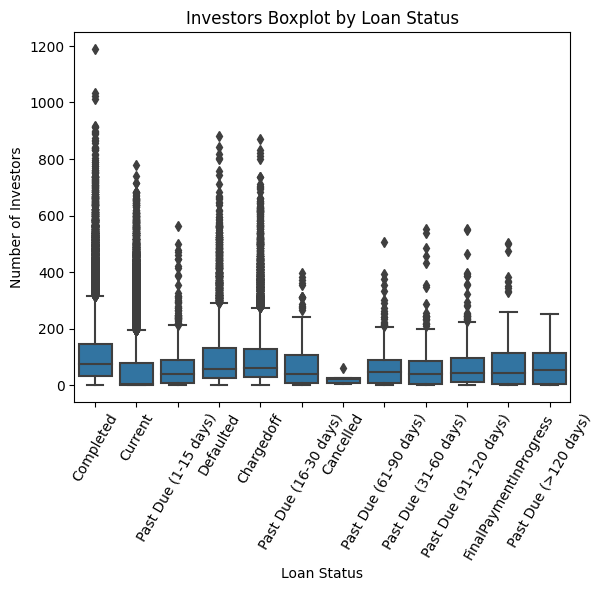

In [10]:
sns.boxplot(data=df, x="LoanStatus", y="Investors", color = "#1f77b4")
plt.title("Investors Boxplot by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Number of Investors")
plt.xticks(rotation=60)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The boxplot illustrates the distribution of investor numbers across various loan statuses. Completed loans tend to have a higher median number of investors compared to loans that are still ongoing or past due. This suggests that investors may be more inclined to participate in loans that successfully reach completion. Additionally, defaulted and charged-off loans show a wide range of investor participation, with significant variability. This indicates that even high-risk loans managed to attract a considerable number of investors.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Severely past-due loans (e.g., over 120 days) and canceled loans tend to have a lower median number of investors, suggesting that investors may actively avoid loans with higher default risks. However, the presence of outliers across all categories indicates that certain loans—regardless of status—still managed to attract a significantly higher number of investors. This could be driven by factors such as high interest rates or strong borrower creditworthiness.

Text(50.72222222222221, 0.5, 'Monthly Income')

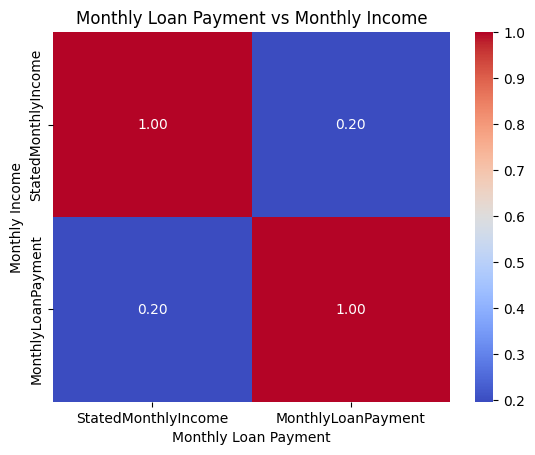

In [11]:
correlation = df[["StatedMonthlyIncome", "MonthlyLoanPayment"]].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Monthly Loan Payment vs Monthly Income")
plt.xlabel("Monthly Loan Payment")
plt.ylabel("Monthly Income")

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The correlation heatmap presents a weak relationship between stated monthly income and monthly loan payments, with a correlation coefficient of 0.20. This suggests that while higher-income borrowers may have relatively higher loan payments, the connection is not particularly strong. Factors such as loan terms, interest rates, and individual financial situations likely play a role in shaping monthly loan payments. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One particularly interesting observation is that the weak correlation suggests that having a higher income does not necessarily result in proportionally larger loan payments. Some high-income borrowers choose smaller loans with more conservative payments, even though they have the financial capacity for higher amounts.

## Multivariate Exploration

Text(0.5, 1.05, 'Borrower Rate by Loan Amount and Employment Status')

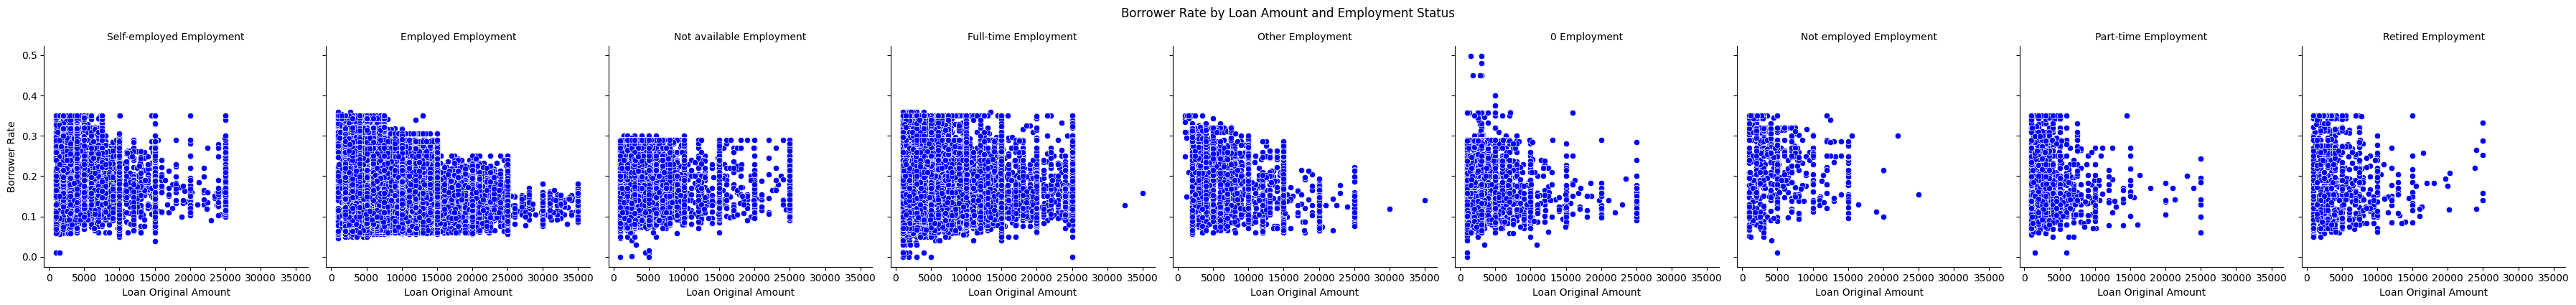

In [12]:
facet_plot = sns.FacetGrid(df, col="EmploymentStatus", height=4, aspect=1)
facet_plot.map(sns.scatterplot, "LoanOriginalAmount", "BorrowerRate", color='blue')
facet_plot.set_axis_labels("Loan Original Amount", "Borrower Rate")
facet_plot.set_titles(col_template="{col_name} Employment")
facet_plot.fig.suptitle("Borrower Rate by Loan Amount and Employment Status", y=1.05)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Based on the scatterplots, there is a difference in borrower rates for various employment statuses, but there is not much in the way of trend between loan sizes and borrower rates. However, some of the employment statuses, such as full-time and employed borrowers, have tightly clustered data points and are thus more common among loan applicants.

> Within each of these loan categories, borrower rates are fairly spread out across loan sizes but trend lower as loan sizes are larger—i.e., as loan sizes increase, borrower rates can be slightly lower. That could be taken as suggesting borrowers making larger loans have superior loan terms, perhaps as a reflection of superior credit profiles or financial security.

> In contrast, self- and unemployed borrowers have a more widespread pattern in which borrower rates are still fairly high for lower loan sizes. It may be that lenders are treating them as riskier and are charging them relatively high borrower rates across loan sizes.

### Were there any interesting or surprising interactions between features?

> An interesting detail is that unemployed and retired borrowers tend to have higher borrower rates, even for lower loan amounts. This could suggest that lenders perceive them as riskier applicants, possibly due to fixed or irregular sources of income.

> An unusual trend is noted in the "0 Employment" category, where borrower rates are disproportionately high even for smaller loan amounts. This makes sense, as having no employment status likely signals higher risk to lenders, leading to increased interest rates or stricter lending conditions.

> Furthermore, while I expected self-employed individuals to have borrower rates similar to full-time employees, their distribution is noticeably more scattered. This could indicate that their perceived risk level varies significantly, potentially depending on factors such as business stability, proof of earnings, or credit history.

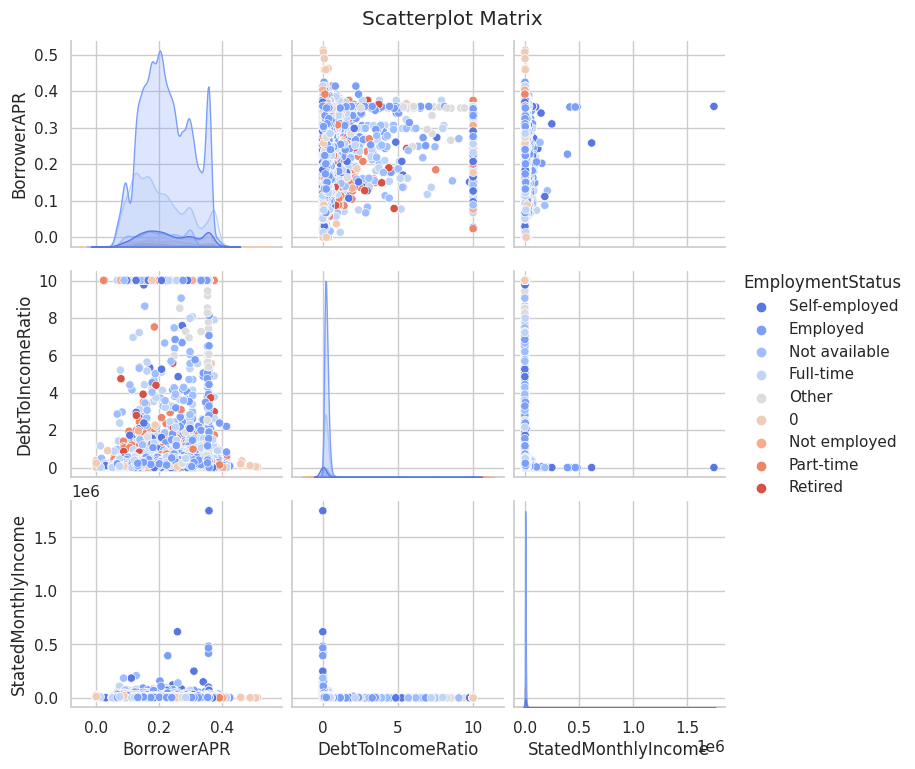

In [16]:
sns.pairplot(df, vars=["BorrowerAPR", "DebtToIncomeRatio", "StatedMonthlyIncome"], 
             hue="EmploymentStatus", palette="coolwarm", diag_kind="kde")

plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> A clear trend in the scatterplot matrix is that there is no strong linear relationship between BorrowerAPR (interest rate) and Debt-to-Income Ratio. Borrowers who have low and high Debt-to-Income Ratios have a range of interest rates, and this is a signal there are variables at work beyond debt load in determining BorrowerAPR.

> An apparent trend is extreme skewing in Stated Monthly Income. The majority of borrowers have relatively modest monthly incomes, but some have extremely high values. It could be indicative of outliers or high-income borrowers who are able to qualify for larger loans or better interest rates. Yet there is no seeming correlation between income and BorrowerAPR, in that high-income borrowers can have high APRs, perhaps based on loan type or credit quality.

> Although APR is derived based on individual credit profiles, there is some clustering in each status, and it appears there is some lending influence based on status, but perhaps not entirely. Full-time and salaried borrowers are clustered in some neighborhoods, and self- and retiree borrowers are spread out.

### Were there any interesting or surprising interactions between features?

> Surprisingly, we have Debt-to-Income packed tightly at lower values and there are hardly any borrowers who have debt at extreme values. It is possible there are strict lending policies for lending to applicants who have debt values at extremes, or there are just a majority of borrowers who have debt at lower values.

> A compelling interrelationship exists between Stated Monthly Income and Debt-to-Income Ratio. While borrowers may report highly increased incomes, in some cases, their Debt-to-Income Ratios may not be lower as a consequence, suggesting they have widespread debt balances in place in spite of highly compensated status. It is possible that income alone is no gauge of financial soundness, and alternative indicators may be utilized in measuring risk by lenders.

> Finally, BorrowerAPR is represented as having multiple peaks, implying that interest charges are not being allocated equally across borrowers based on characteristics but are rather influenced by predetermined loan classes, credit tiers, or lender policies.

## Conclusions
> The research comprehensively studied the Prosper Loan Dataset, analyzing borrower behavior, loan performance, and risk estimation. The goal was to understand lending behavior and establish variables that affect loan approval, interest charges, and defaults.

> Key Takeaways:
1. Job Status and Income: Full-time employees had improved loan conditions, but rising income alone wasn’t necessarily linked to lower interest rates. Lenders likely consider other risk factors.

2. Debt-to-Income Ratio: A higher ratio didn’t always lead to higher interest rates, indicating that lenders use multiple factors when assessing risk.

3. Loan Status & Investor Trends: Settled loans attracted more investors, while charged-off or defaulted loans had fewer, suggesting investors favor safer options.

4. Borrower APR Trends: Interest rates showed multiple peaks instead of a smooth distribution, implying that borrowers are categorized into predefined risk groups.

5. Estimated Loss & Return: A negative correlation was observed—higher estimated losses were linked to lower returns, highlighting high-risk, low-reward loans.

> This study reveals that loan approvals and interest rates depend on a variety of factors beyond just income and employment. Lenders use risk profiles to categorize borrowers into different tiers, which ultimately influence their loan terms. Borrowers can leverage these insights to make smarter financial decisions, while lenders can refine their risk assessment strategies. Future research could explore how credit scores and loan conditions interact with these variables to gain deeper insights into loan performance.